In [ ]:
""" Tutorial of network x
Going through the tutorial of the 
following website: 

https://networkx.github.io/documentation/stable/tutorial.html


"""

In [6]:
import networkx as nx
import matplotlib.pyplot as plt #for graph visualization

# how to create node

In [2]:
G = nx.Graph()

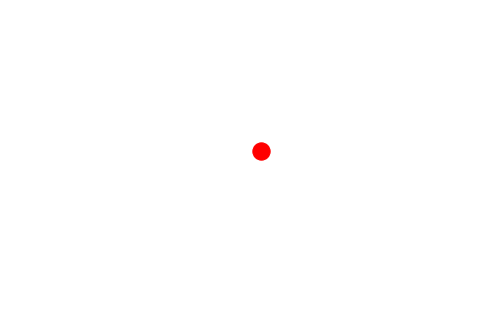

In [9]:
G.add_node(1)

nx.draw(G)
plt.show()

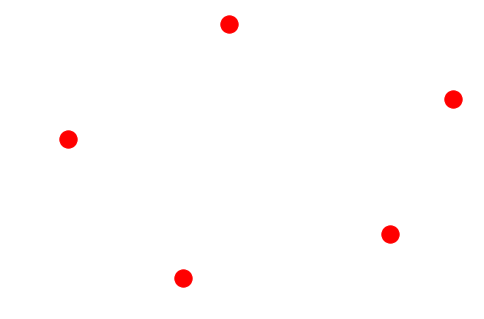

In [14]:
#adds on 4 nodes for 2,3,4,5
G.add_nodes_from([2,5])


nx.draw(G)
plt.show()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


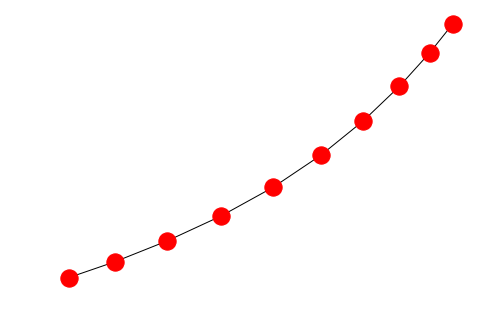

In [15]:
#creates just a path with 10 nodes
H = nx.path_graph(10)
nx.draw(H)
plt.show()

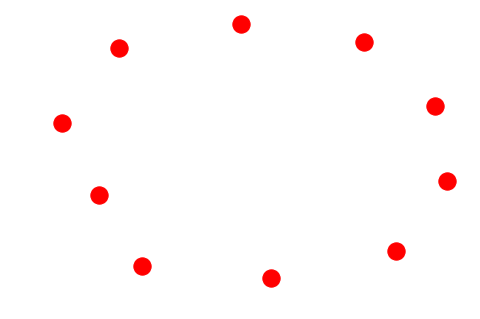

In [17]:
#just makes sure there are 10 nodes, overwrites the others
G.add_nodes_from(H)
nx.draw(G)
plt.show()

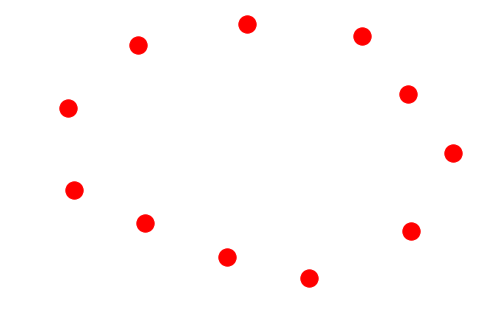

In [18]:
#adds the H graph itself as a node
G.add_node(H)
nx.draw(G)
plt.show()

# adding edges

In [ ]:
# the * in python unpacks things that might be in a list
"""
function(1,2,3) = function(*[1,2,3])

"""

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


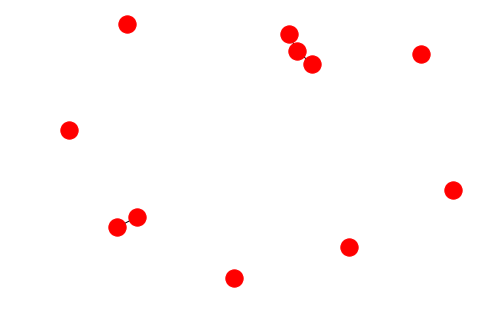

In [29]:
#this will only add an edge between the first and last argument
#so if have edge as a tuple, will need to unpack it
G.add_edge(1,2)
G.add_edge(2,3)

new_edge = (4,5)
G.add_edge(*new_edge)
nx.draw(G)
plt.show()

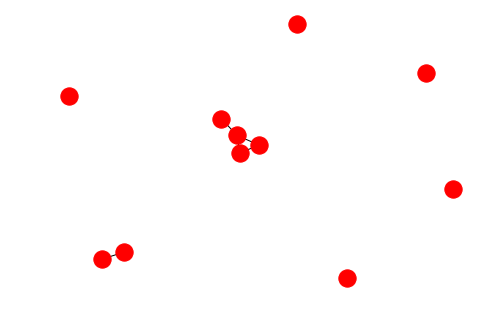

In [31]:
#if want to add list of edges
G.add_edges_from([(7,2),(7,3)])
nx.draw(G)
plt.show()

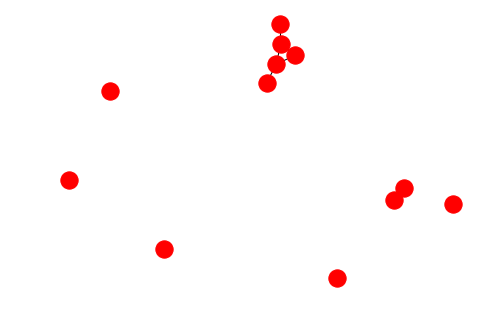

In [33]:
#OBSERVATION: don't have to add nodes before edges, will do so automatically
G.add_edge(3,"m") #even though node m doesn't exist, will add it
nx.draw(G)
plt.show()



In [34]:
#can find out the number of edges and nodes have
print(G.number_of_edges())
print(G.number_of_nodes())

6
12


In [37]:
#how to get data on the nodes and edges
print(list(G.nodes))
print(G.edges)

[1, 2, 3, 4, 5, 0, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7f5d694cbba8>, 'm']
[(1, 2), (2, 3), (2, 7), (3, 7), (3, 'm'), (4, 5)]


In [38]:
#how to get the neighbors of one of them
list(G.adj[1])

[2]

In [39]:
list(G.adj[2]) #gets the edges for that node
list(G.adj["m"])

[1, 3, 7]

In [45]:
print(G.degree(2)) #the number of edges something has
G.add_edge(2,11)
print(G.degree(2))
print(G.edges(2))

3
4
[(2, 1), (2, 3), (2, 7), (2, 11)]


In [47]:
G.edges([2,3]) #gets total edges for all of those nodes
G.degree([2,3])

DegreeView({2: 4, 3: 3})

In [ ]:
""" HOW TO REMOVE NODES AND EDGES
G.remove_node(2)
G.remove_nodes_from("spam")
G.remove_edge(1,3)

"""

# ACCESSING EDGES AND NEIGHBORS

In [58]:
G[1] #corresponds to the edges for node 1
G["m"] #corresponds to the edges for node "m"

AtlasView({3: {}})

In [52]:
list(G.adj[2]) #will list all of edges for that node

[1, 3, 7, 11]

In [61]:
#can set attributes using subscript
G[2][3] #references the edge between node 2 and 3 (stores data for that edge)

{}

In [64]:
#shows how to add attributes to an edge
G[2][3]["color"] = "blue"
G[2]

AtlasView({1: {}, 3: {'color': 'blue'}, 7: {}, 11: {}})

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


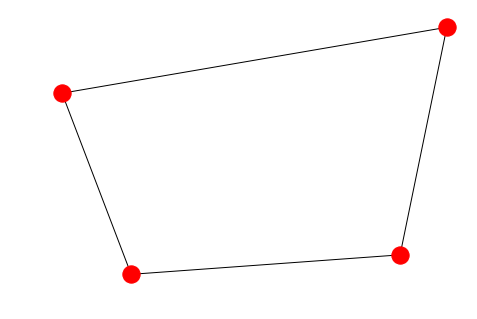

In [72]:
#to quickly see the pairs, use G.adjacency() or G.adj.items()
# undirected graphs would see the iteration twice

FG = nx.Graph()

FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))
            
nx.draw(FG)
plt.show()

#conclusion: shows that if undirected then these EDGES will counted twice


In [78]:
FG.edges.data() #returns list of tuples of node1,node2,dictionary of attributes
FG.edges.data("weight") #returns list of tuples of node1,node2,attribute 

EdgeDataView([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

# ADDING ATTRIBUTES TO GRAPHS/NODES/EDGES

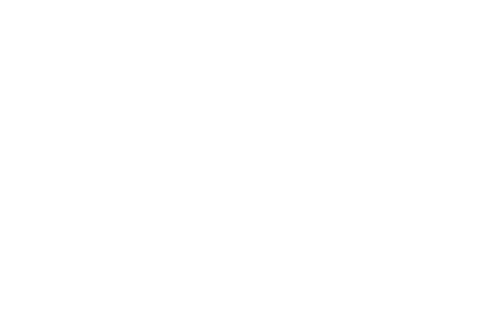

In [80]:
"""
All nodes or edges can hold attributes in dictionaries associated with them

"""
B = nx.Graph(day="friday") #empty graph with associated attribute
#but obviously shows empty graph
nx.draw(B)
plt.show()

In [87]:
#node attributes
B.add_node(1,time="5pm",other_time="6pm") #specify attributes as extra parameters in nodes
B.add_nodes_from([1,3,7],time="7pm")
B.nodes[1]

#to get the data of everything
B.nodes.data()

NodeDataView({1: {'time': '7pm', 'other_time': '6pm'}, 3: {'time': '7pm'}, 7: {'time': '7pm'}})

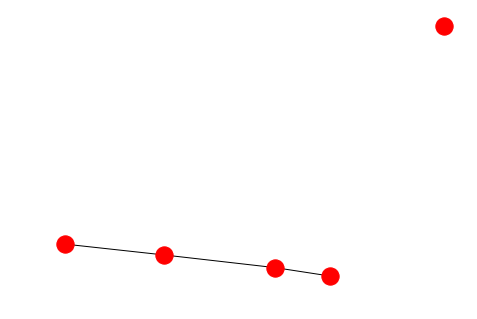

EdgeDataView([(1, 2, {'weight': 8}), (3, 2, {'color': 'blue'}), (3, 4, {'color': 'red'})])

In [92]:
#edges attributes
B.add_edge(1,2,weight=4.7) #can just add properties as extra arguments
B.add_edges_from([(2,3),(3,4)],color="red") #will add the key,value  color:red for all the edges
nx.draw(B)
plt.show()

B.add_edges_from([(2,3,dict(color="blue")),(1,2,dict(weight=8))])
B.edges.data()

#the weight attribute is special


# GRAPH generators and graph operators

In [93]:
""" Different types of operators
1) operators to help quickly create graphs from other graphs
2) create graphs from classic smaller graphs
3) classic graphs with arguments for size
4) classic graph generator with arguments (probably comes up with a different graph every call)

"""
            
            
            

' Different types of operators\n1) operators to help quickly create graphs from other graphs\n2) create graphs from classic smaller graphs\n3) classic graphs with arguments for size\n4) classic graph generator with arguments (probably comes up with a different graph every call)\n\n'

# analyzing graphs

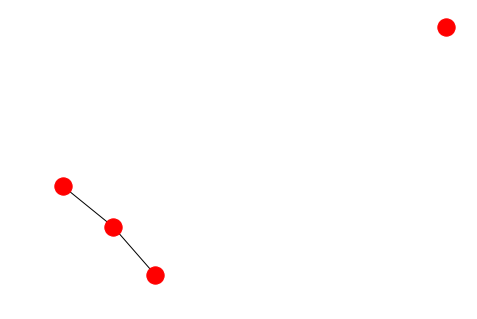

[{1, 2, 3}, {'spam'}]

In [96]:
#get the connected components groups:
newG = nx.Graph()
newG.add_edges_from([(1,2),(1,3)])
newG.add_node("spam")
nx.draw(newG)
plt.show()
list(nx.connected_components(newG))

In [97]:
#can get the number of connections for each
newG.degree()

DegreeView({1: 2, 2: 1, 3: 1, 'spam': 0})

In [98]:
list(newG.degree())

[(1, 2), (2, 1), (3, 1), ('spam', 0)]

# DRAWING GRAPHS

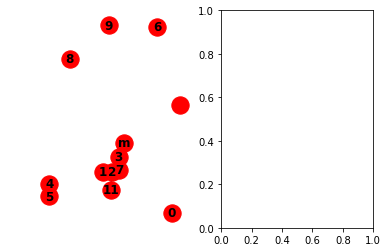

In [100]:
plt.subplot(121)
nx.draw(G,with_labels=True,font_weight="bold")
plt.subplot(122)
#nx.draw_shell(G,nlist=[range(5,10),range(5)],with_labels=True)
plt.show()

In [ ]:
#there are differeent nx.draw_[insert type] you can use to draw different ways